<a href="https://colab.research.google.com/github/sftSalman/tensorflowBasic/blob/main/updated_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
fmnist = tf.keras.datasets.fashion_mnist

In [3]:
(train_images,train_label),(test_images,test_label)= fmnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
train_label.shape

(60000,)

In [7]:
test_label.shape

(10000,)

In [8]:
print(train_label[0])

9


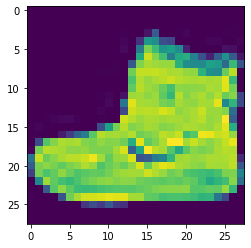

In [9]:
plt.imshow(train_images[0])


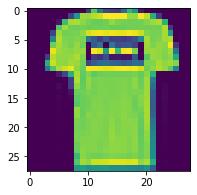

In [10]:
plt.figure(figsize=(3,3))
plt.imshow(train_images[1])
plt.show()

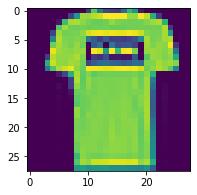

In [11]:
plt.figure(figsize=(9,3))
plt.imshow(train_images[1])
plt.show()

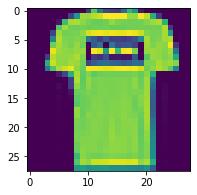

In [12]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0, 10, 0.1)
y = np.sin(x)

plt.figure(figsize=(9, 3))
plt.imshow(train_images[1])
plt.show()

In [13]:
train_images[0].shape

(28, 28)

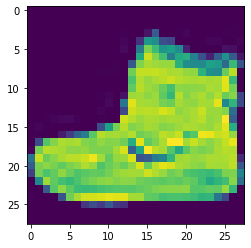

In [14]:
fig, axes = plt.subplots(nrows=1,ncols=1)
axes.imshow(train_images[0])

In [15]:
a = np.linspace(0,10,11)
b = a ** 4
x = np.arange(0,10)
y = 2 * x

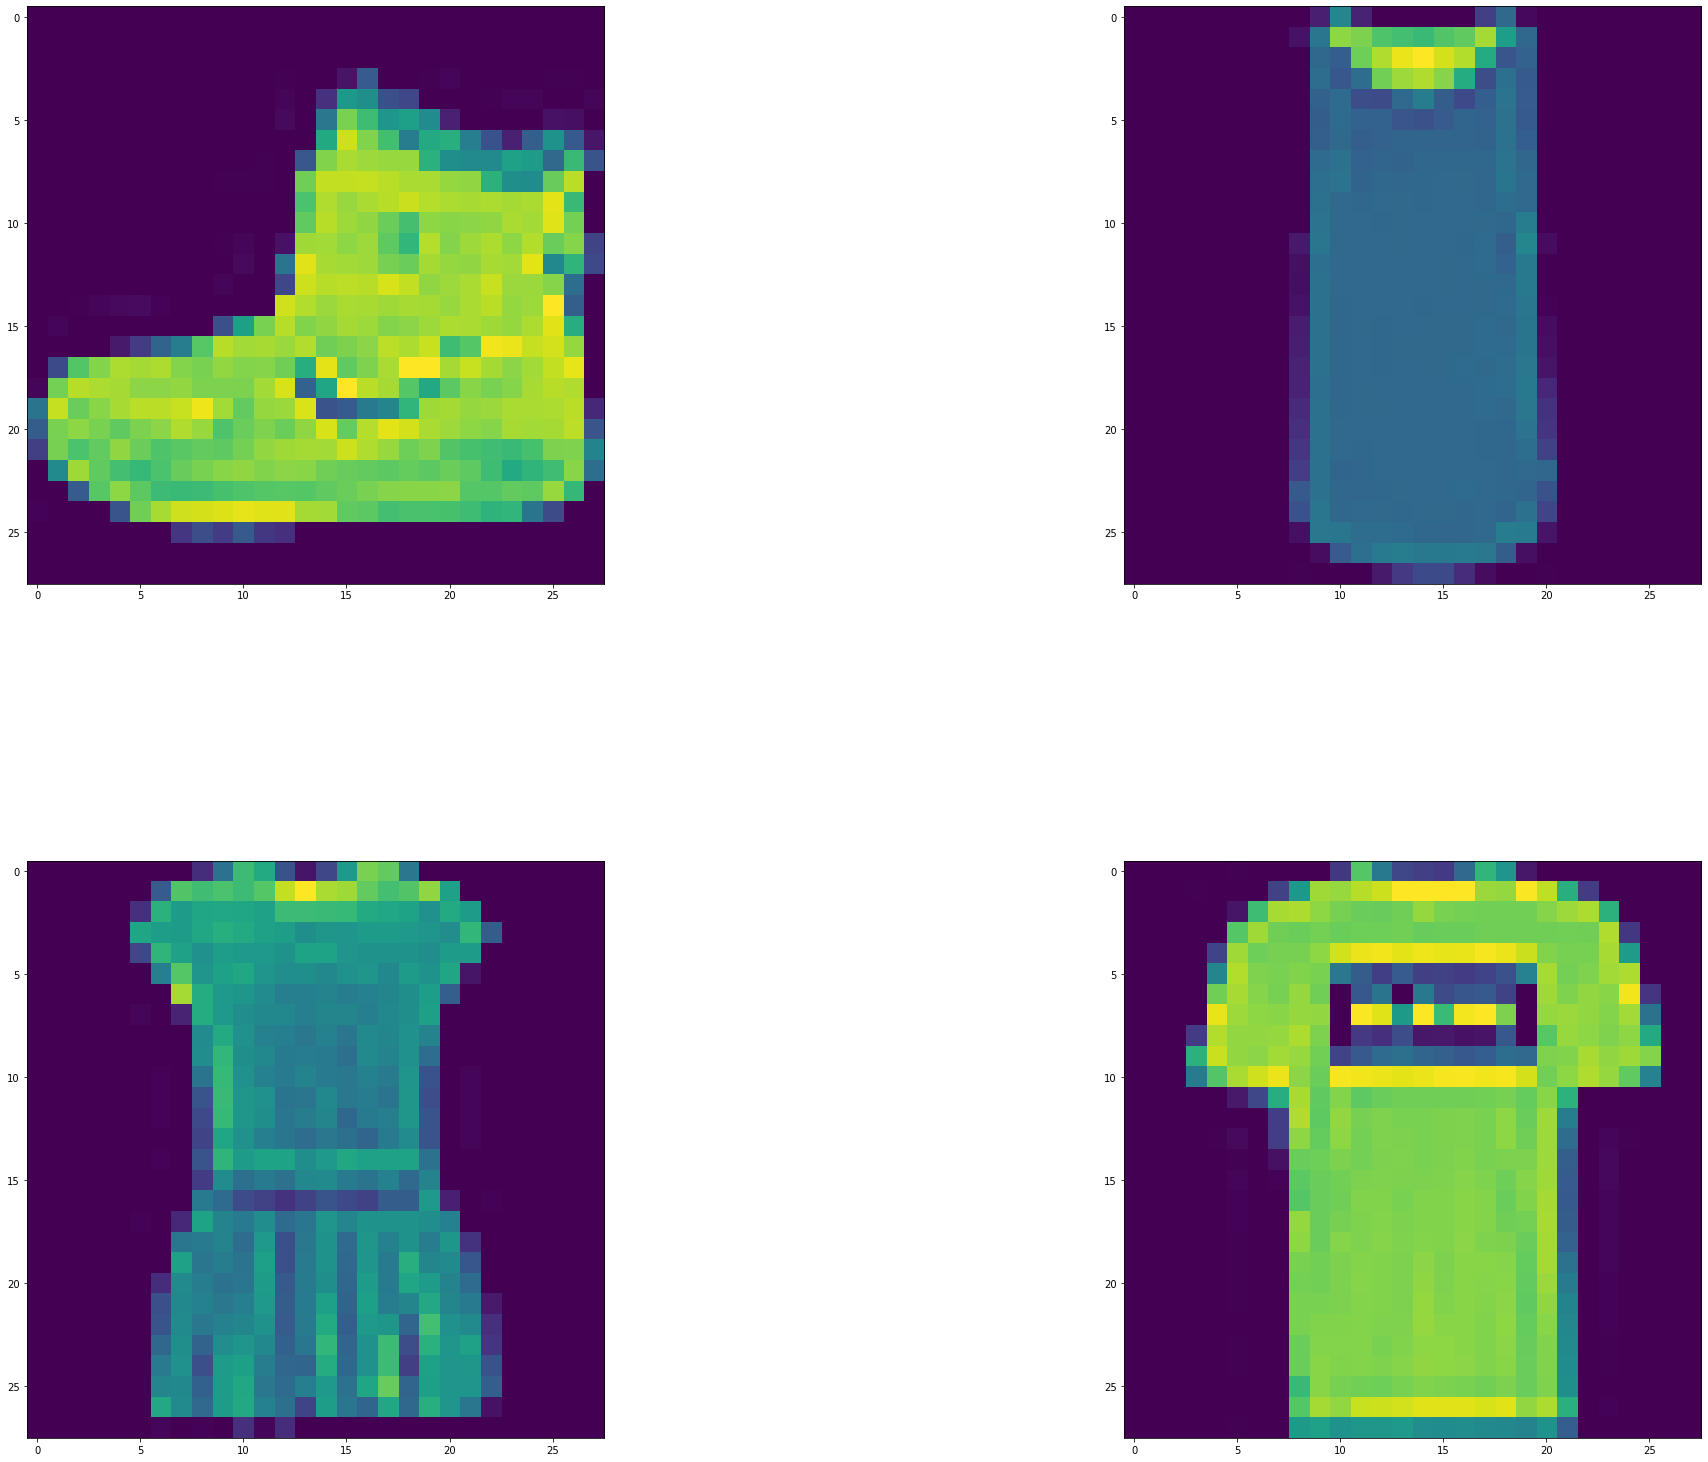

In [16]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(30,30))

# Parameters at the axes level
#for i range(0,3)
axes[0][0].imshow(train_images[0])
axes[1][1].imshow(train_images[1])
axes[0][1].imshow(train_images[2])
axes[1][0].imshow(train_images[3])

# Use left,right,top, bottom to stretch subplots
# Use wspace,hspace to add spacing between subplots
fig.subplots_adjust(left=None,
    bottom=None,
    right=None,
    top=None,
    wspace=0.9,
    hspace=0.1,)

plt.show()

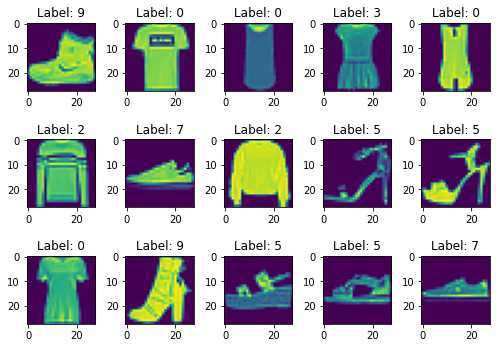

In [18]:

fig, axes = plt.subplots(3, 5, figsize=(7,5))
for i in range(15):
    ax = axes[i//5, i%5]
    ax.imshow(train_images[i])
    ax.set_title('Label: {}'.format(train_label[i]))
plt.tight_layout()
plt.show()

In [19]:
train_images = train_images/255.0
test_images = test_images/255.0

In [22]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(128,activation=tf.nn.relu),
                                   tf.keras.layers.Dense(10,activation= tf.nn.softmax)])

In [23]:
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

input to softmax function: [[1. 3. 4. 2.]]


In [24]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [25]:
model.fit(train_images,train_label,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4967 - accuracy: 0.8239
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3734 - accuracy: 0.8654
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3357 - accuracy: 0.8778
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3127 - accuracy: 0.8852
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2940 - accuracy: 0.8905


In [26]:
model.evaluate(test_images,test_label)

313/313 [==============================] - 1s 1ms/step - loss: 0.3800 - accuracy: 0.8666


[0.38002899289131165, 0.866599977016449]

In [28]:
classification = model.predict(test_images)

In [35]:
print(max(classification[0]))

0.9904455


In [38]:
print(np.where(classification[0]==0.9904455))

(array([9]),)


In [33]:
print(classification[0])

[2.3580901e-06 4.6803819e-08 1.6149728e-07 7.0799906e-08 1.6229375e-06
 6.9835200e-04 9.3127528e-07 8.8478243e-03 3.0797530e-06 9.9044549e-01]


In [36]:
print(type(classification[0]))

<class 'numpy.ndarray'>


In [30]:
print(test_label[0])

9


9


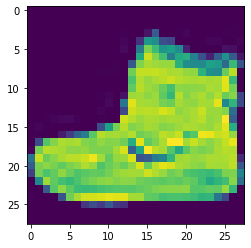

In [40]:


plt.imshow(train_images[0])
print(train_label[0])

In [54]:
# adding callback 

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('accuracy')>0.820):
      print('canceling training')
      self.model.stop_training = True

In [55]:
# adding more neuron 

callbacks = myCallback()

minst = tf.keras.datasets.fashion_mnist
(training_images,training_label),(testing_images, testing_label)=minst.load_data()
training_images= training_images/255.0
testing_images = testing_images/255.0
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10,activation= tf.nn.softmax)])
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss="sparse_categorical_crossentropy",
              metrics = ['accuracy'])
model.fit(training_images,training_label,epochs=5,callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4722 - accuracy: 0.8308


In [56]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.830): # Experiment with changing this value
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
1871/1875 [============================>.] - ETA: 0s - loss: 0.4702 - accuracy: 0.8326
Reached 60% accuracy so cancelling training!
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4700 - accuracy: 0.8326
